Q.1 A permutation perm of n + 1 integers of all the integers in the range
[0, n] can be represented as a string s of length n where:<br>
• s[i] == 'I' if perm[i] < perm[i + 1], and<br>
• s[i] == 'D' if perm[i] > perm[i + 1].<br>
Given a string s, reconstruct the permutation perm and return it. If
there are multiple valid permutations perm, return any of them.<br>
Example 1:<br>
Input: s = "IDID"<br>
Output:<br>
[0,4,1,3,2]

In [8]:
# Ans:
def permutationPerm(s):
    perm=[]
    n=len(s)
    low=0
    high=n
    for ch in s:
        if ch=='I':
            perm.append(low)
            low+=1
        elif ch=='D':
            perm.append(high)
            high-=1
        
    perm.append(low)
    return perm

s = "IDID"
permutationPerm(s)

[0, 4, 1, 3, 2]

Q.2 You are given an m x n integer matrix matrix with the following two
properties:<br>
• Each row is sorted in non-decreasing order.<br>
• The first integer of each row is greater than the last integer of the
previous row.<br>
Given an integer target, return true if target is in matrix or false 
otherwise. You must write a solution in O(log(m * n)) time complexity.<br>
Example 1:<br>
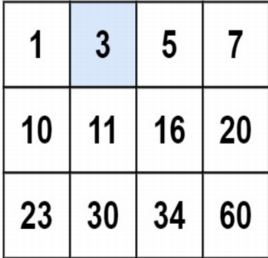<br>
Input: matrix = [[1,3,5,7],[10,11,16,20],[23,30,34,60]], target = 3<br>
Output: true

In [15]:
# Ans:
def search_matrix(matrix,target):
    rows=len(matrix)
    cols=len(matrix[0])
    left=0
    right=rows*cols-1
    while left<=right:
        mid=(left+right)//2
        row=mid// cols
        col=mid% cols
        if matrix[row][col]==target:
            return True
        elif matrix[row][col]<target:
            left=mid+1
        else:
            right = mid-1
    return False

matrix = [[1,3,5,7],[10,11,16,20],[23,30,34,60]]
target = 3
s=search_matrix(matrix,target)
print("Output:",s)

Output: True


Q.3 Given an array of integers arr, return true if and only if it is a valid
mountain array. Recall that arr is a mountain array if and only if:<br>
• arr.length >= 3<br>
• There exists some i with 0 < i < arr.length - 1 such that:<br>
◦ arr[0] < arr[1] < ... < arr[i - 1] < arr[i]<br>
◦ arr[i] > arr[i + 1] > ... > arr[arr.length - 1]<br><br>
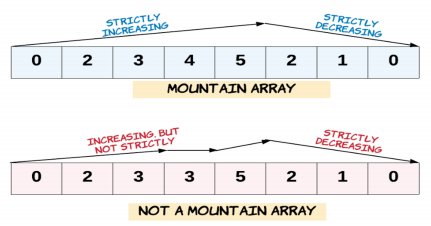<br>
Example 1:<br>
Input: arr = [2,1]<br>Output:
false

In [17]:
# Ans:
def valid_mountain_array(arr):
    n=len(arr)
    if n<3:
        return False
    left=0
    right=n-1
    
    while left<n-1 and arr[left]< arr[left+1]:
        left+=1
        
    while right>0 and arr[right]> arr[right-1]:
        right-=1
        
    return left == right and left!=0 and right !=n-1

arr = [2,1]
s=valid_mountain_array(arr)
print("Output:",s)

Output: False


Q.4 Given a binary array nums, return the maximum length of a
contiguous subarray with an equal number of 0 and 1.<br>
Example 1:<br>
Input: nums = [0,1]<br>
Output: 2<br>
Explanation:<br>
[0, 1] is the longest contiguous subarray with an equal number of 0
and 1

In [18]:
# Ans:
def findMaxLength(nums):
    max_length = 0
    count = 0
    count_map = {0: -1}

    for i in range(len(nums)):
        count += 1 if nums[i] == 1 else -1

        if count in count_map:
            length = i - count_map[count]
            max_length = max(max_length, length)
        else:
            count_map[count] = i

    return max_length

nums = [0,1]
s=findMaxLength(nums)
print("Output:",s)

Output: 2


Q.5 The product sum of two equal-length arrays a and b is equal to the
sum of a[i] * b[i] for all 0 <= i < a.length (0-indexed).<br>
• For example, if a = [1,2,3,4] and b = [5,2,3,1], the product sum
would be 1*5 + 2*2 + 3*3 + 4*1 = 22.<br>
Given two arrays nums1 and nums2 of length n, return the minimum
product sum if you are allowed to rearrange the order of the elements
in nums1.<br>
Example 1:<br>
Input: nums1 = [5,3,4,2], nums2 = [4,2,2,5]<br>
Output: 40<br>
Explanation:
We can rearrange nums1 to become [3,5,4,2]. The product sum of
[3,5,4,2] and [4,2,2,5] is 3*4 + 5*2 + 4*2 + 2*5 = 40.

In [19]:
# Ans:
def minProductSum(nums1, nums2):
    nums1.sort()
    nums2.sort()
    
    product_sum = 0
    n = len(nums1)
    
    for i in range(n):
        product_sum += nums1[i] * nums2[n - i - 1]
    
    return product_sum

nums1 = [5,3,4,2]
nums2 = [4,2,2,5]
s=minProductSum(nums1, nums2)
print("Output:",s)

Output: 40


Q.6 An integer array original is transformed into a doubled array
changed by appending twice the value of every element in original,
and then randomly shuffling the resulting array.<br>
Given an array changed, return original if changed is a doubled array.
If changed is not a doubled array, return an empty array. The
elements in original may be returned in any order.<br>
Example 1:<br>
Input: changed = [1,3,4,2,6,8]<br>
Output: [1,3,4]<br>
Explanation: One possible original array could be [1,3,4]:<br>
• Twice the value of 1 is 1 * 2 = 2.<br>
• Twice the value of 3 is 3 * 2 = 6.<br>
• Twice the value of 4 is 4 * 2 = 8.<br>
Other original arrays could be [4,3,1] or [3,1,4].

In [20]:
# Ans:
from collections import defaultdict

def findOriginalArray(changed):
    count_map = defaultdict(int)
    for num in changed:
        count_map[num] += 1

    original = []
    for num in changed:
        if count_map[num] == 0:
            continue
        if count_map[num * 2] == 0:
            return []
        count_map[num] -= 1
        count_map[num * 2] -= 1
        original.append(num)

    return original

changed = [1,3,4,2,6,8]
s=findOriginalArray(changed)
print("Output:",s)

Output: [1, 3, 4]


Q.7 Given a positive integer n, generate an n x n matrix filled with
elements from 1 to n2 in spiral order.<br>

In [24]:
# Ans:
def generateMatrix(n):
    matrix = [[0] * n for _ in range(n)]
    num = 1
    target = n * n
    row_start, row_end, col_start, col_end = 0, n - 1, 0, n - 1

    while num <= target:
        for i in range(col_start, col_end + 1):
            matrix[row_start][i] = num
            num += 1
        row_start += 1

        for i in range(row_start, row_end + 1):
            matrix[i][col_end] = num
            num += 1
        col_end -= 1

        for i in range(col_end, col_start - 1, -1):
            matrix[row_end][i] = num
            num += 1
        row_end -= 1

        for i in range(row_end, row_start - 1, -1):
            matrix[i][col_start] = num
            num += 1
        col_start += 1

    return matrix

n = 3
result = generateMatrix(n)
print("Output matrix:")
for row in result:
    print(row)

Output matrix:
[1, 2, 3]
[8, 9, 4]
[7, 6, 5]
